In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [110]:
merged_train = pd.read_csv('../data/merged_train.csv')
spray = pd.read_csv('../data/spray_cleaned.csv')

In [111]:
merged_train

date                 species   latitude  longitude  trap  \
0     2007-05-29  CULEX PIPIENS/RESTUANS  41.867108 -87.654224  T048   
1     2009-09-25           CULEX PIPIENS  41.776156 -87.778927  T155   
2     2009-09-25          CULEX RESTUANS  41.923738 -87.785288  T013   
3     2009-09-25          CULEX RESTUANS  41.960616 -87.777189  T017   
4     2007-08-24          CULEX RESTUANS  41.662014 -87.724608  T135   
...          ...                     ...        ...        ...   ...   
8470  2007-09-05           CULEX PIPIENS  41.673408 -87.599862  T115   
8471  2007-08-08           CULEX PIPIENS  41.726465 -87.585413  T138   
8472  2007-08-28           CULEX PIPIENS  41.673408 -87.599862  T115   
8473  2007-07-25           CULEX PIPIENS  41.673408 -87.599862  T115   
8474  2007-08-16           CULEX PIPIENS  41.673408 -87.599862  T115   

      nummosquitos  wnvpresent  wnvcount  station  tmax  ...  mifg  ra  sn  \
0              1.0         0.0       0.0        2    88  ...   0.0   0   0   
1              1.0         0.0       0.0        2    70  ...   0.0   1   0   
2              1.0         1.0       1.0        2    70  ...   0.0   1   0   
3              1.0         0.0       0.0        1    70  ...   0.0   1   0   
4              1.0         0.0       0.0        2    81  ...   0.0   1   0   
...            ...         ...       ...      ...   ...  ...   ...  ..  ..   
8470        1648.0         1.0       3.0        2    91  ...   0.0   0   0   
8471        1658.0         1.0       2.0        2    87  ...   0.0   1   0   
8472        2207.0         1.0       2.0        2    90  ...   0.0   0   0   
8473        2356.0         1.0       3.0        2    83  ...   0.0   0   0   
8474        2532.0         1.0      10.0        2    77  ...   0.0   0   0   

      sq  ts  tsra vcts   gr  vcfg  sprayed  
0      0   0     0    0  0.0   0.0        0  
1      0   0     0    0  0.0   0.0        0  
2      0   0     0    0  0.0   0.0        0  
3      0   0     0    0  0.0   0.0        0  
4      0   1     1    0  0.0   0.0        0  
...   ..  ..   ...  ...  ...   ...      ...  
8470   0   0     0    0  0.0   0.0        0  
8471   0   0     1    0  0.0   0.0        0  
8472   0   0     0    0  0.0   0.0        0  
8473   0   0     0    0  0.0   0.0        0  
8474   0   0     0    0  0.0   0.0        0  

[8475 rows x 43 columns]

In [112]:
merged_train['date'] = pd.to_datetime(merged_train['date'])
merged_train['month'] = merged_train.loc[:,'date'].dt.month
merged_train['year'] = merged_train.loc[:,'date'].dt.year

In [113]:
spray['date'] = pd.to_datetime(spray['date'])
spray['year'] = spray.loc[:,'date'].dt.year

In [119]:
# 2011-08-29 spray data is dropped as the spray location is away from the all the provided trap data.
spray = spray.loc[spray['date'] > '2011-08-29']


spray_2011 = spray.loc[spray['year'] == 2011]
spray_2013 = spray.loc[spray['year'] == 2013]

## Error Analysis

## Cost Benefit Analysis

### Spraying in Chicago

For the city of Chicago, to control adult mosquito population, they will be spraying a form of insecticide called Zenivex E4. Zenivex E4 is an insecticide which is fast-decomposing and harmless to humans. It will be sprayed on a truck mounted fogger in a proccess known as Ultra Low Volume fogging. The active ingredient in Zenivex has a half-life of 1.5 days in water and 4.4 days in soil. Each spray sessions will typically last from dusk to 1 a.m. and will use approximately 1.5 fluid ounces per acre. [Source](https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf)

In Chicago, during 2011, there are 8 human infections of the west nile virus. While in 2013, there are 37 human infections. 

Currently, spraying is only performed around traps which had mosquitos with west nile virus present in 2 consequtive weeks. [Source](https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/West_Nile_Virus/WNV_2018databrief_FINALJan102019.pdf)



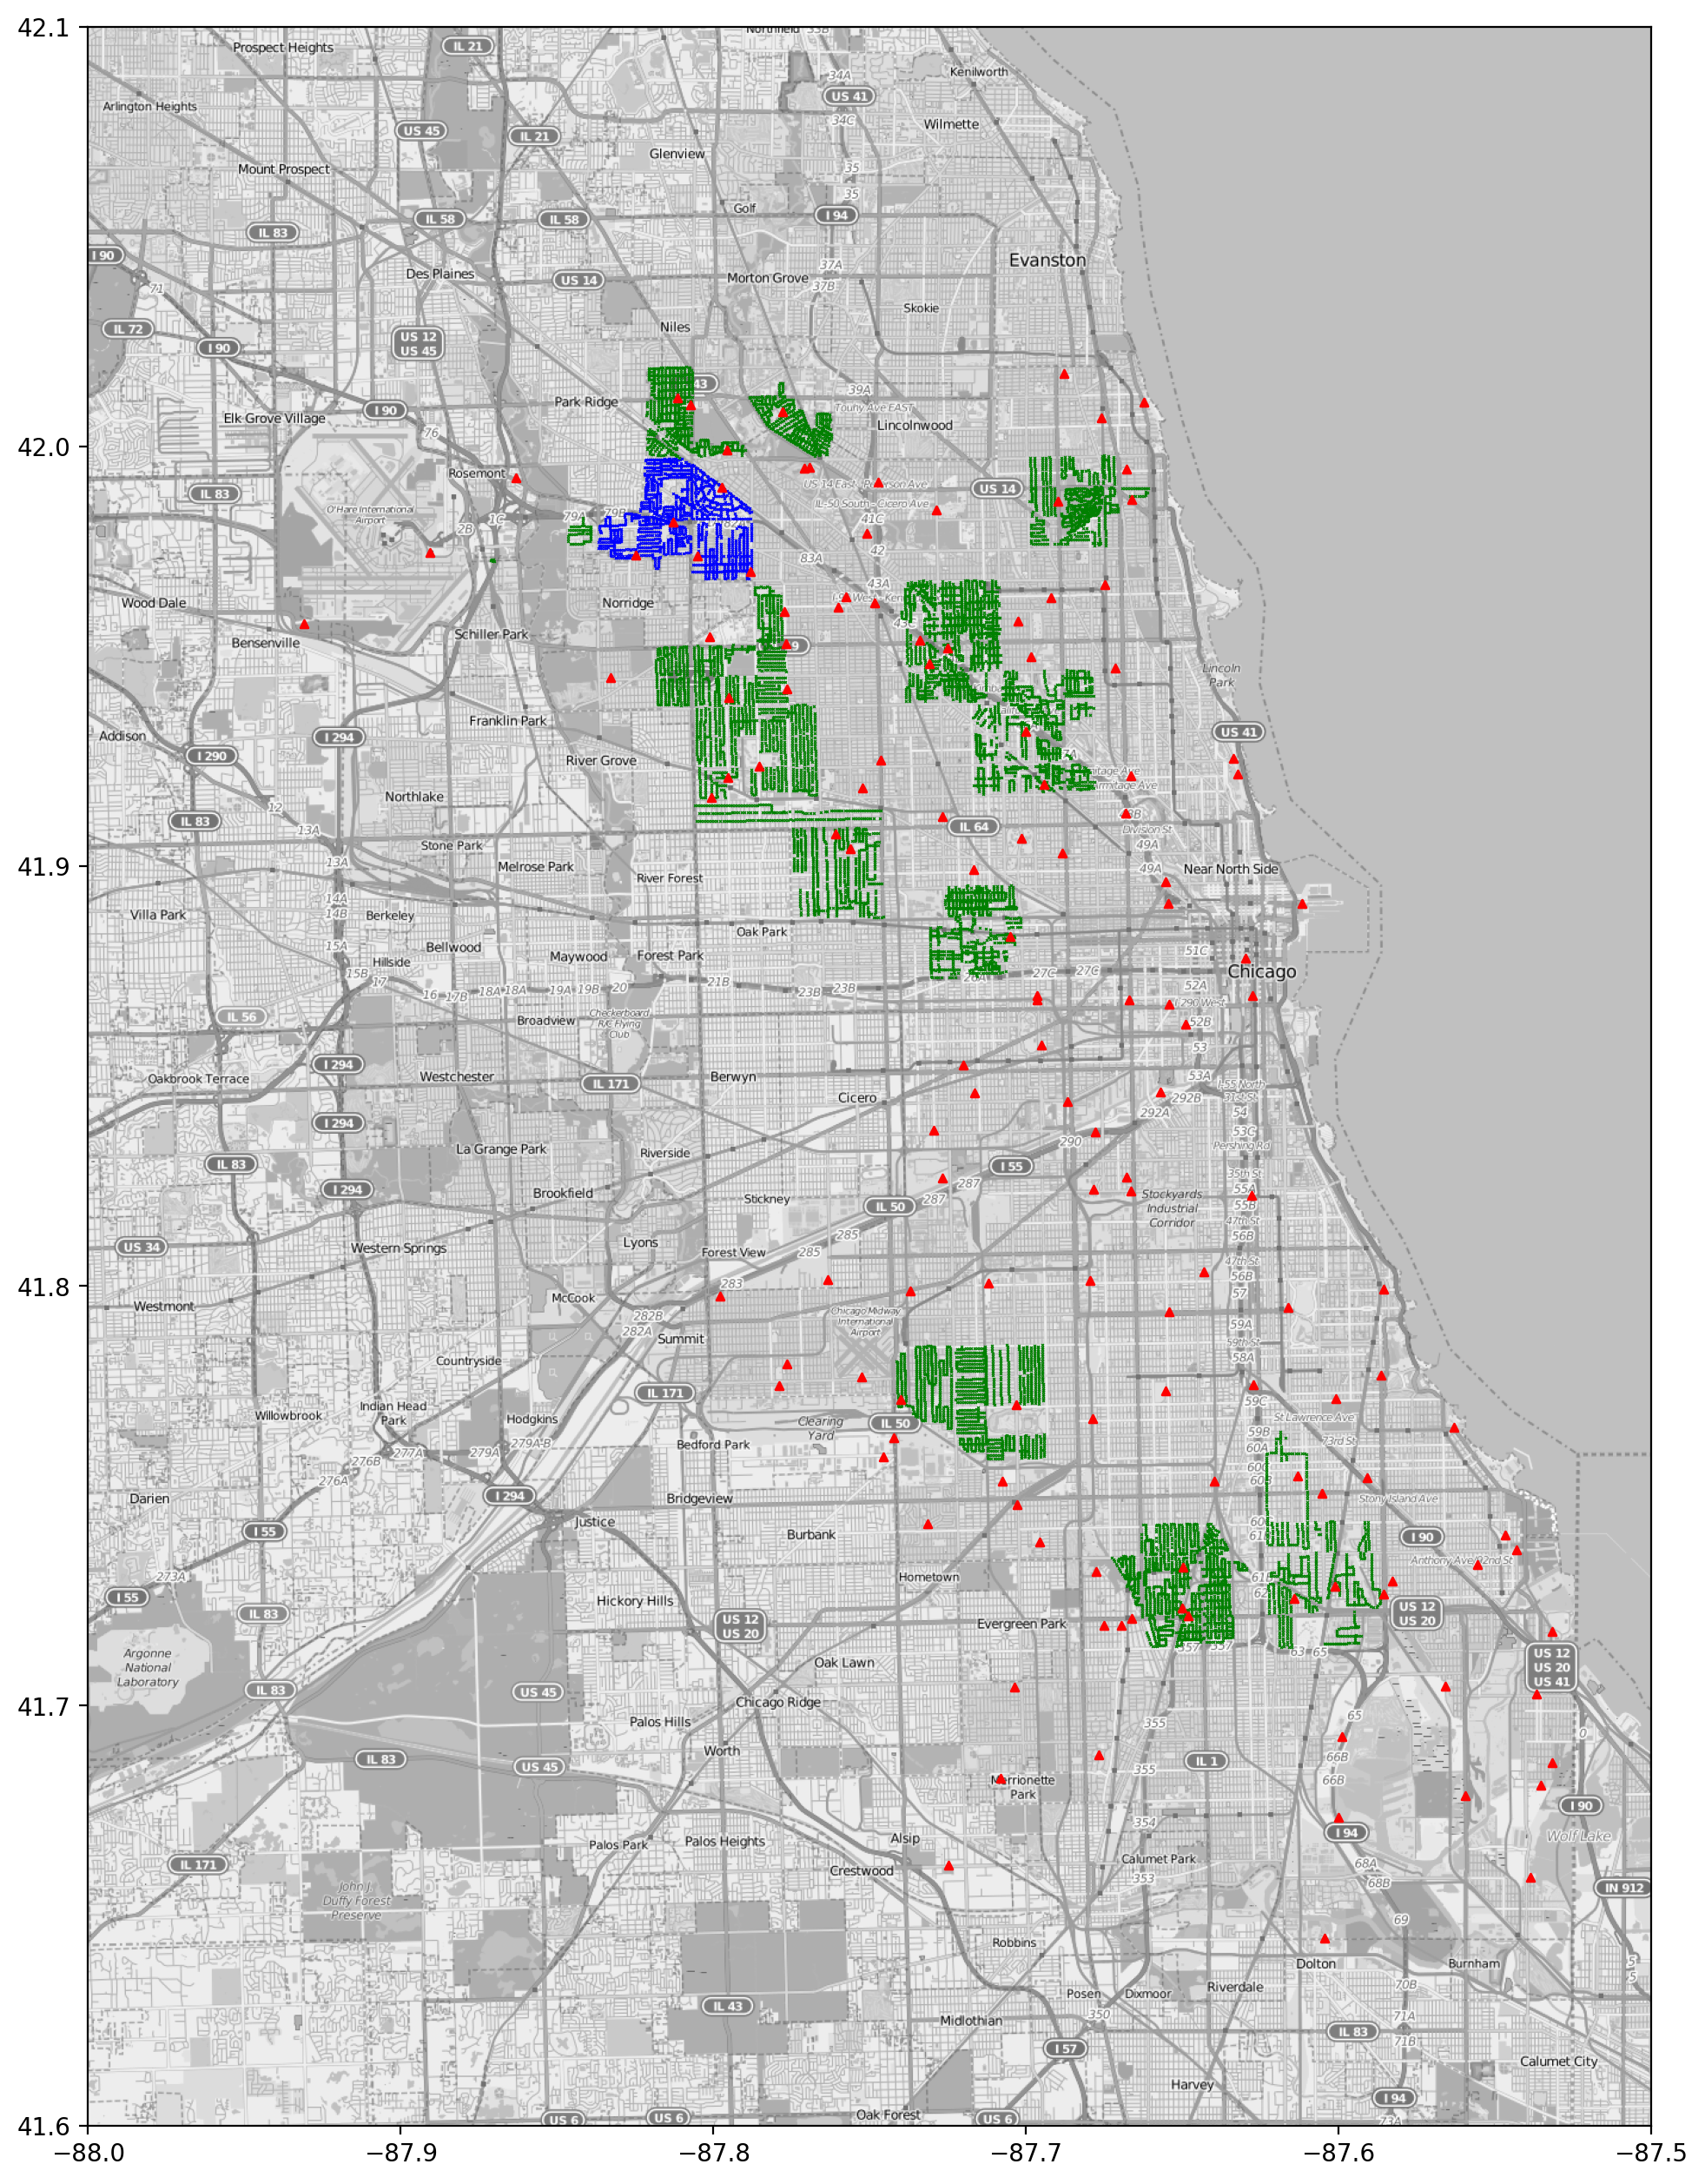

In [126]:
mapdata = np.loadtxt('../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt')

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(16,16), dpi=200 )
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
               aspect=aspect)

locations_2011 = spray_2011[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations_2011[:,0], locations_2011[:,1], marker='x', s= 0.1, c='blue');

locations_2013 = spray_2013[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations_2013[:,0], locations_2013[:,1], marker='x', s= 0.1, c='green');

locations_traps = merged_train[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations_traps[:,0], locations_traps[:,1], marker='^', s= 10, c='red');


### Effectiveness of spraying on mosquitos

To evaluate the effectiveness of spraying on mosquitos, we looked at the monthly growth of the number of mosquitos per year.

In [27]:
# Creating a function to plot no. of mosquitos in a given year
def plot_all_nummos(df, year):
    import matplotlib.ticker as mticker
    df = df.loc[df['year'] == year]
    new_df = pd.DataFrame(df.groupby(['month'])['nummosquitos'].sum())
    
    plt.plot(new_df, label=year)
    plt.rcParams["figure.figsize"] = (12,7)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.grid(color = 'black', axis='y', linestyle = '-.', linewidth = 0.5)
    plt.legend();

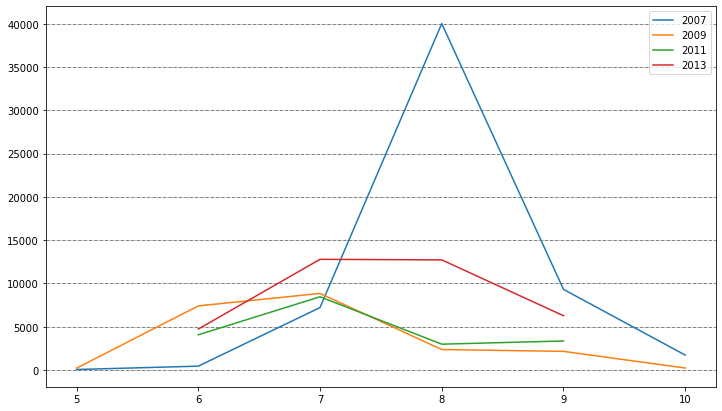

In [29]:
years = [2007, 2009, 2011, 2013]

for year in years:
    plot_all_nummos(merged_train, year)

As seen in the graph above, the number of mosquitos usually peak at July and have a steady decrease towards the later months. This is in line with the summer months of June, July and August which provides the optimal breeding conditions for mosquitos.

There is an exception in year 2007 where there was a sudden and abnormal spike in August, however, there are insufficient information provided to explain the anomaly.

Furthermore, spray data was only provided for years 2011 and 2013. Hence, we will be mainly focuing on these 2 years. 

In 2011, there were 2 separate dates where spray data was provided, however, as one of the sprayed location was far away from any of the trap data provided, that particular date was discarded. 

#### Exploring 2011 Spray Data

In [149]:
spray_2011.describe()

latitude    longitude    year
count  2114.000000  2114.000000  2114.0
mean     41.983344   -87.805927  2011.0
std       0.006702     0.012738     0.0
min      41.968435   -87.836560  2011.0
25%      41.977943   -87.816806  2011.0
50%      41.985556   -87.803253  2011.0
75%      41.986460   -87.794225  2011.0
max      41.997028   -87.787710  2011.0

As 2011 had only 1 date which spray data was provided, we are able to narrow down the trap which alerted the city of Chicago to spray.

In [180]:
spray_loc_2011 = (
    (merged_train['latitude'] >= 41.968435) & 
    (merged_train['latitude'] <= 41.997028) & 
    (merged_train['longitude'] >= -87.836560) &
    (merged_train['longitude'] <= -87.787710) & 
    (merged_train['year'] == 2011)
)

traps_within_2011_spray = merged_train.loc[spray_loc_2011]

In [151]:
traps_within_2011_spray.loc[traps_within_2011_spray['wnvpresent'] == 1]

date                 species   latitude  longitude  trap  \
3821 2011-08-12          CULEX RESTUANS  41.973845 -87.805059  T223   
4787 2011-08-26  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223   
6441 2011-09-01  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223   
7452 2011-09-23  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223   
8269 2011-07-29  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223   

      nummosquitos  wnvpresent  wnvcount  station  tmax  ...  ra  sn  sq  ts  \
3821           3.0         1.0       1.0        1    81  ...   0   0   0   0   
4787           5.0         1.0       1.0        1    83  ...   0   0   0   0   
6441          11.0         1.0       1.0        1    93  ...   0   0   0   0   
7452          24.0         1.0       1.0        1    62  ...   0   0   0   0   
8269          90.0         1.0       1.0        1    86  ...   0   0   0   0   

      tsra  vcts   gr  vcfg  sprayed  year  
3821     0     0  0.0   0.0        0  2011  
4787     0     0  0.0   0.0        0  2011  
6441     0     0  0.0   0.0        0  2011  
7452     0     0  0.0   0.0        0  2011  
8269     0     0  0.0   0.0        0  2011  

[5 rows x 44 columns]

Based on the criteria which was mentioned earlier, the hotspot is assumed to be identified on 2011-09-01 as it is the 2nd week where wnv is present in the trap. 

There also seemed to have a delay which a hotspot was identified as the spraying was peformed on 2011-09-07. This is reasonable as it takes time to activate the spraying procedure. 

In [193]:
def plot_trap(trap_num, year_start, year_end):
    train_plot = merged_train.loc[(merged_train['trap'] == trap_num)]
    group_nummos = train_plot.groupby(train_plot['date'].dt.date)['nummosquitos'].sum()
    
    start = dt.datetime.strptime(year_start, '%Y').date()
    end = dt.datetime.strptime(year_end, '%Y').date()
    
    df = pd.DataFrame(group_nummos)
    sdf = (df.index > start) & (df.index < end)
    plt.figure(figsize=(12,9))
    plt.plot(df.loc[sdf])
    
    plt.grid(color = 'black', axis='y', linestyle = '-.', linewidth = 0.5)
    
    plt.title(f'No. of Mosquitos in 2011 (Trap: {trap_num})')
    plt.xlabel('No. of Mosquitos')
    plt.ylabel('Date');

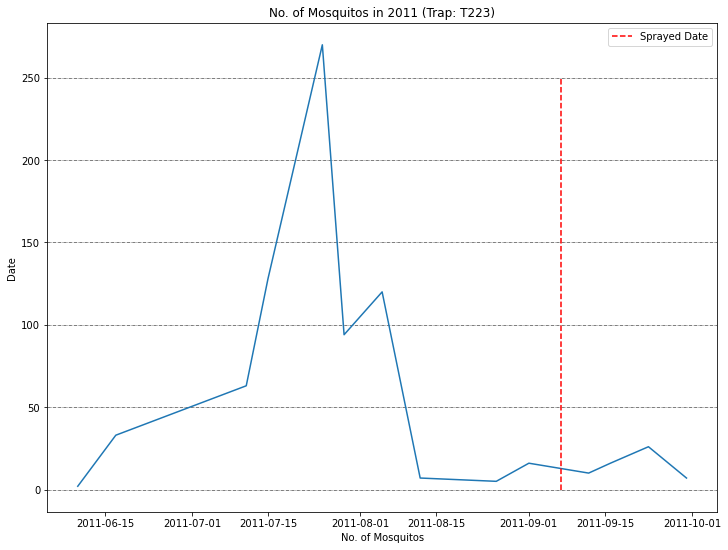

In [196]:
plot_trap('T223', '2010', '2012')

plt.vlines(
x= dt.datetime.strptime('2011-09-07', '%Y-%m-%d').date(),
ymin=0,
ymax=250,
color='red',
linestyle='dashed',
label='Sprayed Date'
)

plt.legend();

While it seems that the spray for this trap only resulted in a minor dip in the overall number of mosquitos, the table below shows that the spray was effective in suppressing the mosquitos affected with WNV for at least 2 weeks.

In [199]:
traps_within_2011_spray.set_index('date').sort_index()

species   latitude  longitude  trap  nummosquitos  \
date                                                                           
2011-06-10  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           2.0   
2011-06-17          CULEX RESTUANS  41.973845 -87.805059  T223          33.0   
2011-07-11  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223          22.0   
2011-07-11          CULEX RESTUANS  41.973845 -87.805059  T223          41.0   
2011-07-15         CULEX TERRITANS  41.973845 -87.805059  T223           2.0   
2011-07-15  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223         118.0   
2011-07-15          CULEX RESTUANS  41.973845 -87.805059  T223           8.0   
2011-07-25  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223         262.0   
2011-07-25          CULEX RESTUANS  41.973845 -87.805059  T223           8.0   
2011-07-29  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223          90.0   
2011-07-29          CULEX RESTUANS  41.973845 -87.805059  T223           4.0   
2011-08-05           CULEX PIPIENS  41.973845 -87.805059  T223           2.0   
2011-08-05  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223         118.0   
2011-08-12  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           4.0   
2011-08-12          CULEX RESTUANS  41.973845 -87.805059  T223           3.0   
2011-08-26  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           5.0   
2011-09-01  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223          11.0   
2011-09-01          CULEX RESTUANS  41.973845 -87.805059  T223           1.0   
2011-09-01           CULEX PIPIENS  41.973845 -87.805059  T223           4.0   
2011-09-12  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           8.0   
2011-09-12          CULEX RESTUANS  41.973845 -87.805059  T223           2.0   
2011-09-16  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           9.0   
2011-09-16          CULEX RESTUANS  41.973845 -87.805059  T223           7.0   
2011-09-23  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223          24.0   
2011-09-23          CULEX RESTUANS  41.973845 -87.805059  T223           2.0   
2011-09-30          CULEX RESTUANS  41.973845 -87.805059  T223           4.0   
2011-09-30  CULEX PIPIENS/RESTUANS  41.973845 -87.805059  T223           3.0   

            wnvpresent  wnvcount  station  tmax  tmin  ...  ra  sn  sq  ts  \
date                                                   ...                   
2011-06-10         0.0       0.0        1    69    51  ...   1   0   0   0   
2011-06-17         0.0       0.0        1    82    60  ...   0   0   0   0   
2011-07-11         0.0       0.0        1    88    71  ...   0   0   0   0   
2011-07-11         0.0       0.0        1    88    71  ...   0   0   0   0   
2011-07-15         0.0       0.0        1    87    70  ...   0   0   0   0   
2011-07-15         0.0       0.0        1    87    70  ...   0   0   0   0   
2011-07-15         0.0       0.0        1    87    70  ...   0   0   0   0   
2011-07-25         0.0       0.0        1    88    73  ...   0   0   0   0   
2011-07-25         0.0       0.0        1    88    73  ...   0   0   0   0   
2011-07-29         1.0       1.0        1    86    71  ...   0   0   0   0   
2011-07-29         0.0       0.0        1    86    71  ...   0   0   0   0   
2011-08-05         0.0       0.0        1    83    69  ...   1   0   0   0   
2011-08-05         0.0       0.0        1    83    69  ...   1   0   0   0   
2011-08-12         0.0       0.0        1    81    60  ...   0   0   0   0   
2011-08-12         1.0       1.0        1    81    60  ...   0   0   0   0   
2011-08-26         1.0       1.0        1    83    59  ...   0   0   0   0   
2011-09-01         1.0       1.0        1    93    71  ...   0   0   0   0   
2011-09-01         0.0       0.0        1    93    71  ...   0   0   0   0   
2011-09-01         0.0       0.0        1    93    71  ...   0   0   0   0   
2011-09-12         0.0       0.0        1    86    64  ...   0   0  

In [184]:
lat_max = 41.997028
lat_min = 41.968435
long_max = -87.787710
long_min = -87.836560

In [185]:
lat_height = lat_max - lat_min
long_width = long_max - long_min

In [186]:
# Spray area in km2
(lat_height * 100) * (long_width * 100)

13.967680500000832

In [187]:
# KM2 to acre
14 * 247 

3458

For 2013, we will used previously identified traps which had been sprayed, we can then check on the growth of number of mosquitos for those traps.

In [51]:
# Creating a df for traps which were identified to be sprayed.
sprayed_loc = merged_train.loc[(merged_train['sprayed'] == 1)]
sprayed_loc

date                 species   latitude  longitude  trap  \
4797 2013-08-22           CULEX PIPIENS  41.728495 -87.600963  T227   
4906 2013-08-08           CULEX PIPIENS  41.932094 -87.700117  T147   
5951 2013-08-15           CULEX PIPIENS  41.916265 -87.800515  T151   
6345 2013-08-15  CULEX PIPIENS/RESTUANS  41.916265 -87.800515  T151   
6376 2013-08-29          CULEX RESTUANS  41.987280 -87.666066  T231   
6829 2013-08-15  CULEX PIPIENS/RESTUANS  41.904194 -87.756155  T230   
6987 2013-08-22          CULEX RESTUANS  41.728495 -87.600963  T227   
7375 2013-08-22  CULEX PIPIENS/RESTUANS  41.728495 -87.600963  T227   
7446 2013-07-25  CULEX PIPIENS/RESTUANS  41.951866 -87.725057  T228   
7870 2013-08-29  CULEX PIPIENS/RESTUANS  41.987280 -87.666066  T231   

      nummosquitos  wnvpresent  wnvcount  station  tmax  ...  ra  sn  sq  ts  \
4797           5.0         0.0       0.0        2    78  ...   1   0   0   0   
4906           5.0         0.0       0.0        2    79  ...   0   0   0   0   
5951           9.0         1.0       1.0        2    74  ...   0   0   0   0   
6345          11.0         0.0       0.0        2    74  ...   0   0   0   0   
6376          11.0         0.0       0.0        2    87  ...   0   0   0   0   
6829          15.0         1.0       1.0        2    74  ...   0   0   0   0   
6987          16.0         0.0       0.0        2    78  ...   1   0   0   0   
7375          22.0         1.0       1.0        2    78  ...   1   0   0   0   
7446          24.0         0.0       0.0        2    81  ...   0   0   0   0   
7870          39.0         1.0       1.0        2    87  ...   0   0   0   0   

      tsra  vcts   gr  vcfg  sprayed  year  
4797     0     0  0.0   0.0        1  2013  
4906     0     0  0.0   0.0        1  2013  
5951     0     0  0.0   0.0        1  2013  
6345     0     0  0.0   0.0        1  2013  
6376     0     0  0.0   0.0        1  2013  
6829     0     0  0.0   0.0        1  2013  
6987     0     0  0.0   0.0        1  2013  
7375     0     0  0.0   0.0        1  2013  
7446     0     0  0.0   0.0        1  2013  
7870     0     0  0.0   0.0        1  2013  

[10 rows x 44 columns]

It is interesting to note that of the sprayed locations, only 10 locations were identified to have been sprayed. This is due to the fact that there is an activation delay for spraying. It means that they were most likely to have been previously singled out as hotspots by the city of Chicago.

These 10 locations were identified to have been sprayed on the date which the trap data was extracted. They will still be able to show if spraying was effective in controlling the mosquito population.

In [74]:
# Getting the unique trap number.
sprayed_loc['trap'].value_counts()

T227    3
T151    2
T231    2
T147    1
T230    1
T228    1
Name: trap, dtype: int64

In [136]:
# Creating a function to plot the growth of the mosquitos for a particular trap.
def plot_sprayed_effect(trap_num):
    train_plot = merged_train.loc[(merged_train['trap'] == trap_num)]
    group_nummos = train_plot.groupby(train_plot['date'].dt.date)['nummosquitos'].sum()
    
    start = dt.datetime.strptime('2013-01-01', '%Y-%m-%d').date()
    end = dt.datetime.strptime('2013-12-31', '%Y-%m-%d').date()
    
    df = pd.DataFrame(group_nummos)
    sdf = (df.index > start) & (df.index < end)
    plt.figure(figsize=(12,7))
    plt.plot(df.loc[sdf])

    plt.vlines(
    x=sprayed_loc.loc[sprayed_loc['trap'] == trap_num]['date'],
    ymin=0,
    ymax=df['nummosquitos'].max(),
    color='red',
    linestyle='dashed',
    label='Sprayed Date'
    )

    plt.grid(color = 'black', axis='y', linestyle = '-.', linewidth = 0.5)
    
    plt.title(f'No. of Mosquitos in 2013 (Trap: {trap_num})')
    plt.xlabel('No. of Mosquitos')
    plt.ylabel('Date')
    plt.legend();

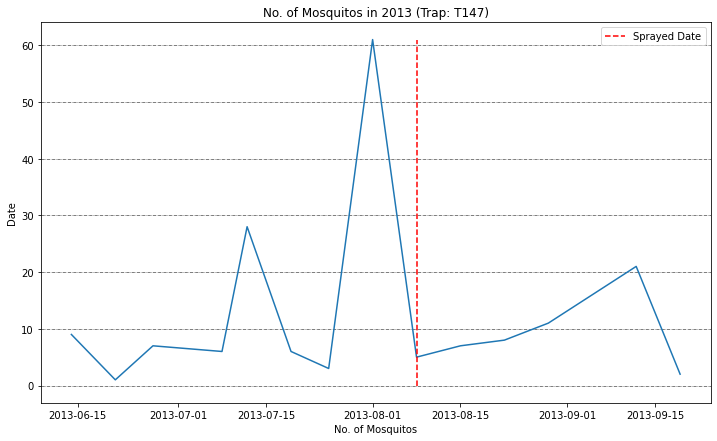

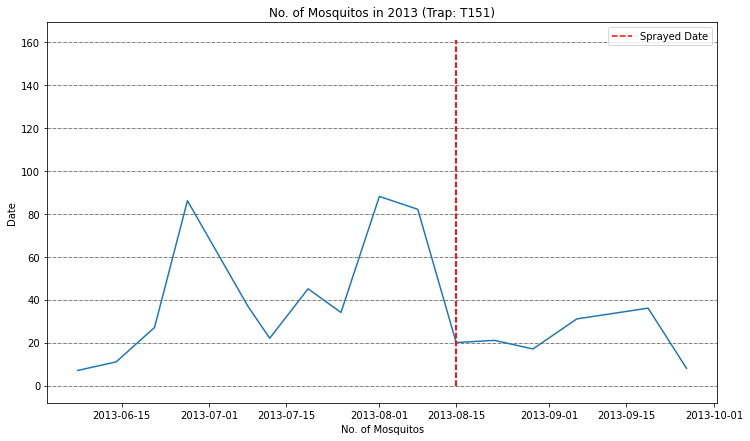

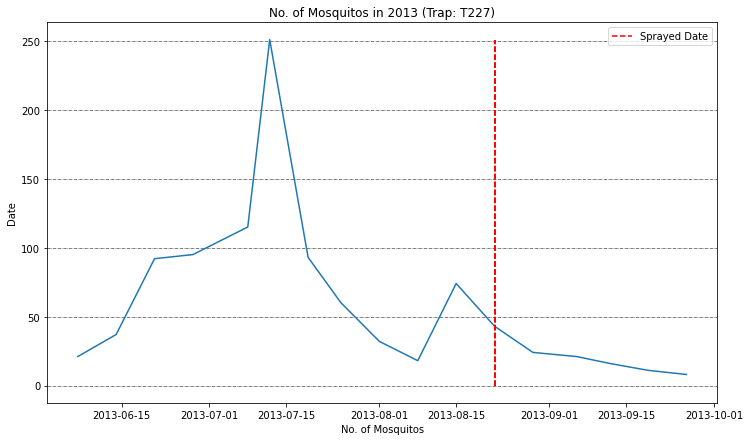

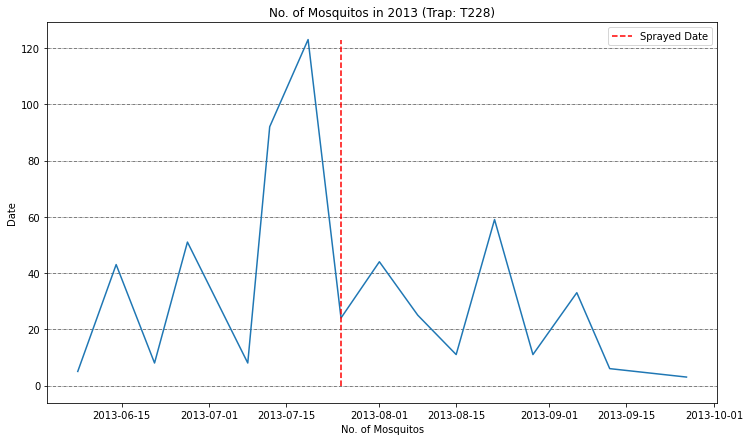

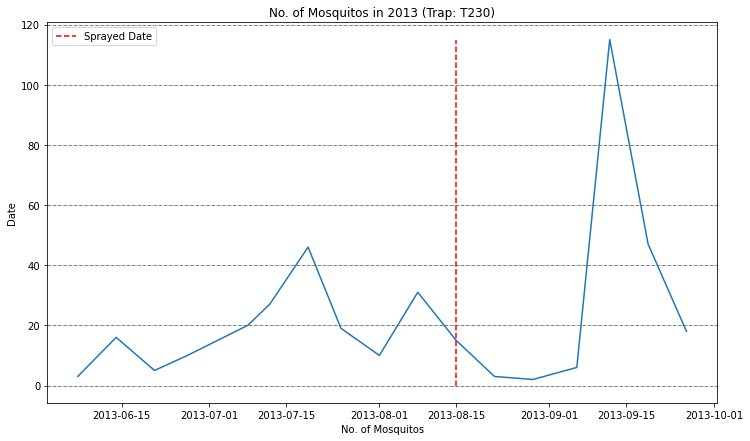

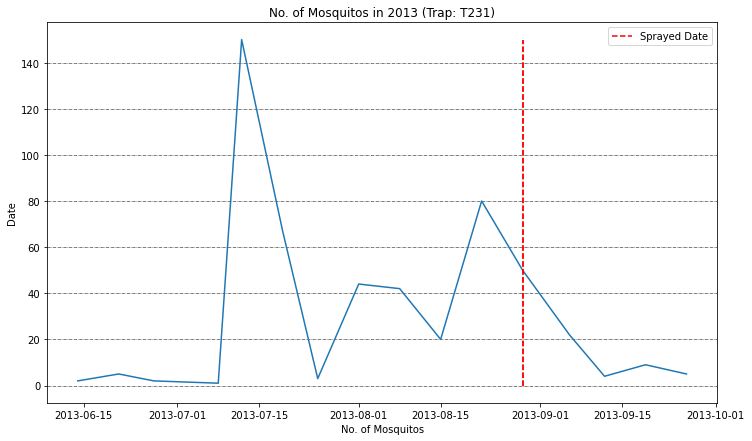

In [138]:
traps = ['T147', 'T151', 'T227', 'T228', 'T230', 'T231']

for trap in traps:
    plot_sprayed_effect(trap)

Based on the graphs above, most of the traps did indeed have an immediate effect in reduction of mosquito population.

### Cost of Spraying

The cost of spraying is at 67¢ / acre. [Source](https://www.centralmosquitocontrol.com/-/media/files/centralmosquitocontrol-na/us/resources-lit%20files/zenivex%20cost%20comparison%20fact%20sheet.pdf) 

The cost of renting a ULV fogging truck is between \\$6,350 to \\$15,840. [Source](http://www.gfmosquito.com/wp-content/uploads/2013/06/2013-North-Dakota-Bid-Tabulation.pdf)

Taking the spray area of chicago's 2013 spray data, the total number of acres sprayed in 1 session is at 2223 acres.
Hence the cost of spray per session is estimated to be \\$12,584. (This cost does not include labour and other overhead costs)

### Cost of medical expenses

Given the data from Sacramento, California in 2005. The West Nile Virus infection is separated into 2 severities, West Nile Fever (WNF) and West Nile neuroinvasive disease (WNND).

It was reported that there were a total of 163 reported cases of West Nile Virus and that the total medical cost associated is approximately \\$2.28 million. [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/)

However, the of total 163 cases, 117(71.8\%) was diagonsed as the less severe WNF, while 46(28.2\%) was diagonsed as the more severe WNND. As such, the medical cost associated is also very different. The total medical cost of WNND is \\$2.14 million and the total medical cost of WNF is \\$19,39. The average medical cost of WNND and WNF is approximately \\$46,000 and \\$167 respectively.

Using the last year which the city of Chicago did not implement any mosquito control measure (2002), the number of infections is 225. Taking away the number of infections in 2013, the estimated number of infections without mosquito control measure is at 188. [Source](https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/West_Nile_Virus/WNV_2018databrief_FINALJan102019.pdf)

Based on the same ratio of severity, the expected cost of medical expense if there are no mosquito control measure would be approximately \\$2.46 million.


### Predicted WNV probability

## Conclusion and Recommendations